In [1]:
# packages

import importlib_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from itertools import combinations
import xlrd
from matplotlib.patches import Ellipse
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

import os
os.chdir(os.path.abspath(''))

In [2]:
filename = 'Raisin_Dataset.xls'
doc = xlrd.open_workbook(filename).sheet_by_index(0)


attributeNames = doc.row_values(0, 0, 7)

classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((900, 7))
for i, col_id in enumerate(range(0, 7)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 901))

# Compute values of N, M and C
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(f'matrix size: {N} by {M}')
print(attributeNames)
print(classNames)


matrix size: 900 by 7
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
['Besni', 'Kecimen']


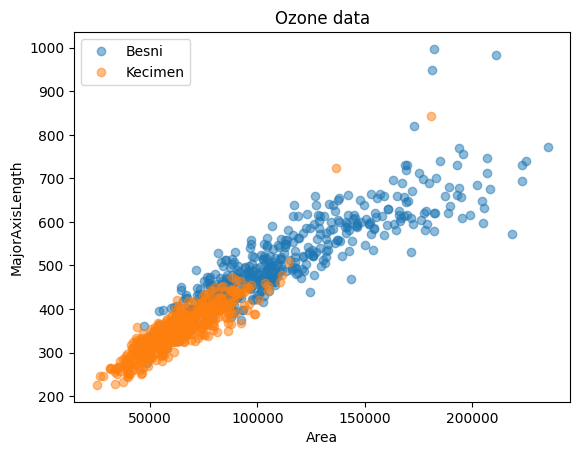

In [3]:
# from ex 2_1_2

i = 0
j = 1

f = plt.figure()
plt.title("Ozone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

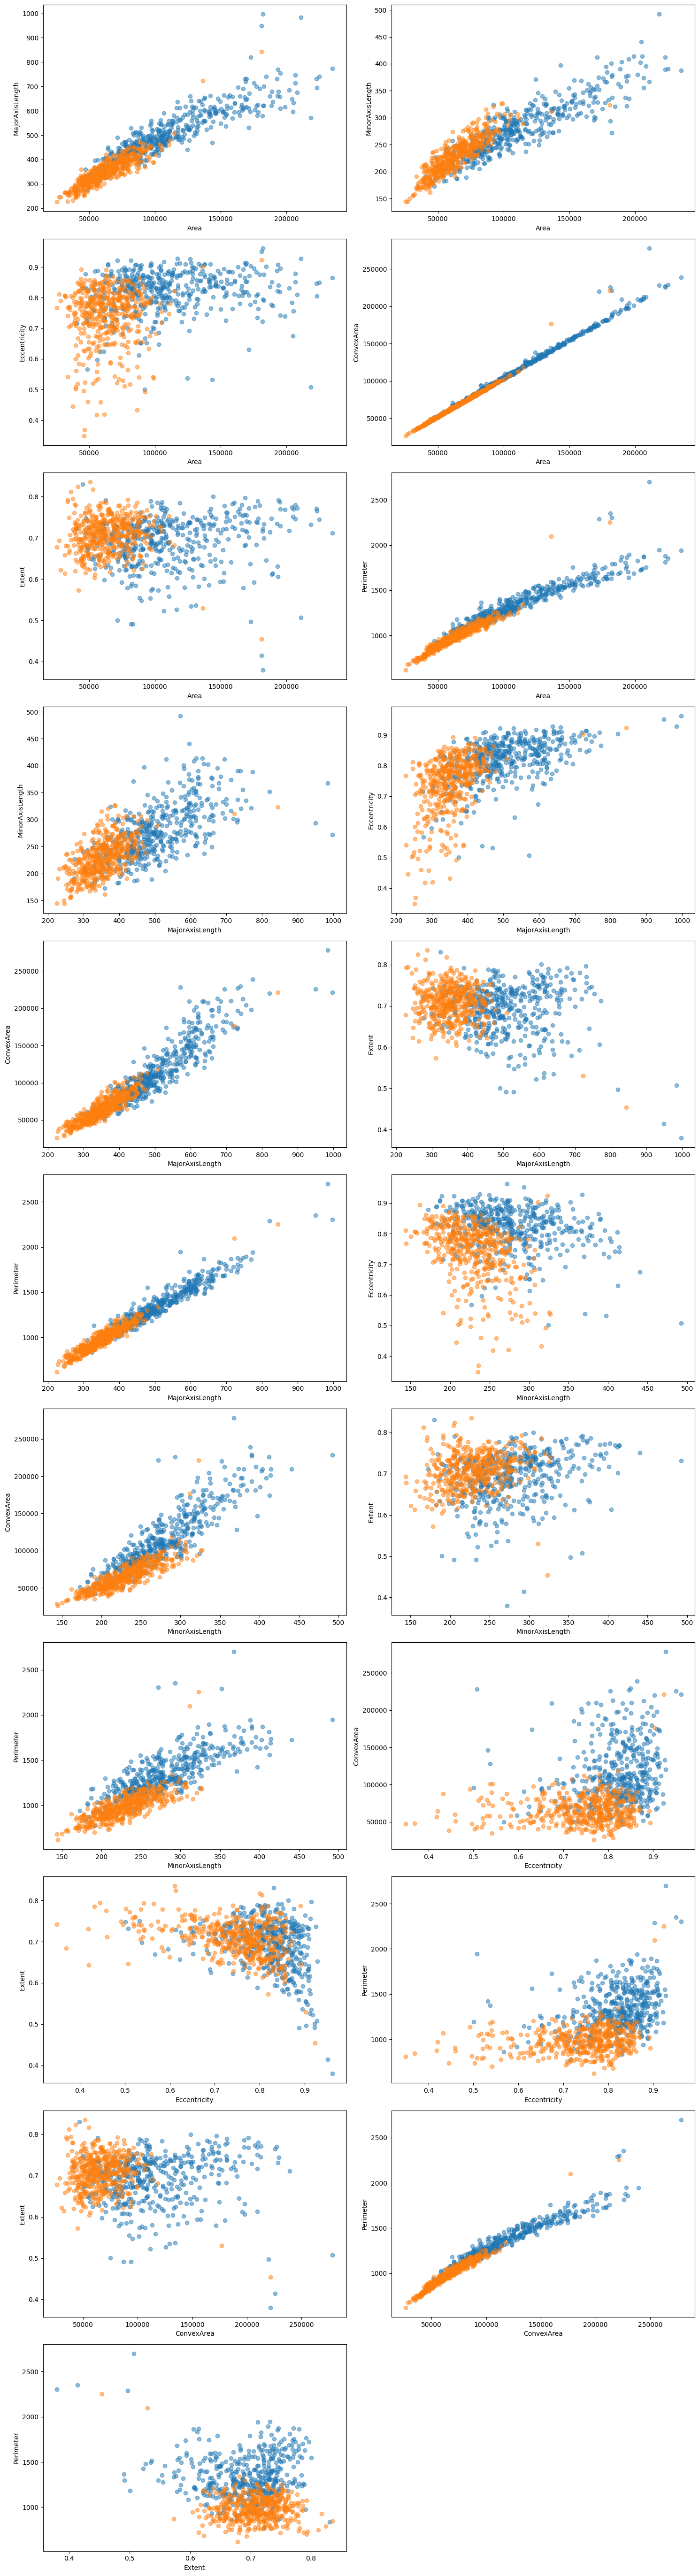

In [4]:
# all combinations

cols = range(0, 7)



# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    #plt.title("")
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.5)
    
    # Set labels for x and y axes
    plt.xlabel(attributeNames[i])
    plt.ylabel(attributeNames[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


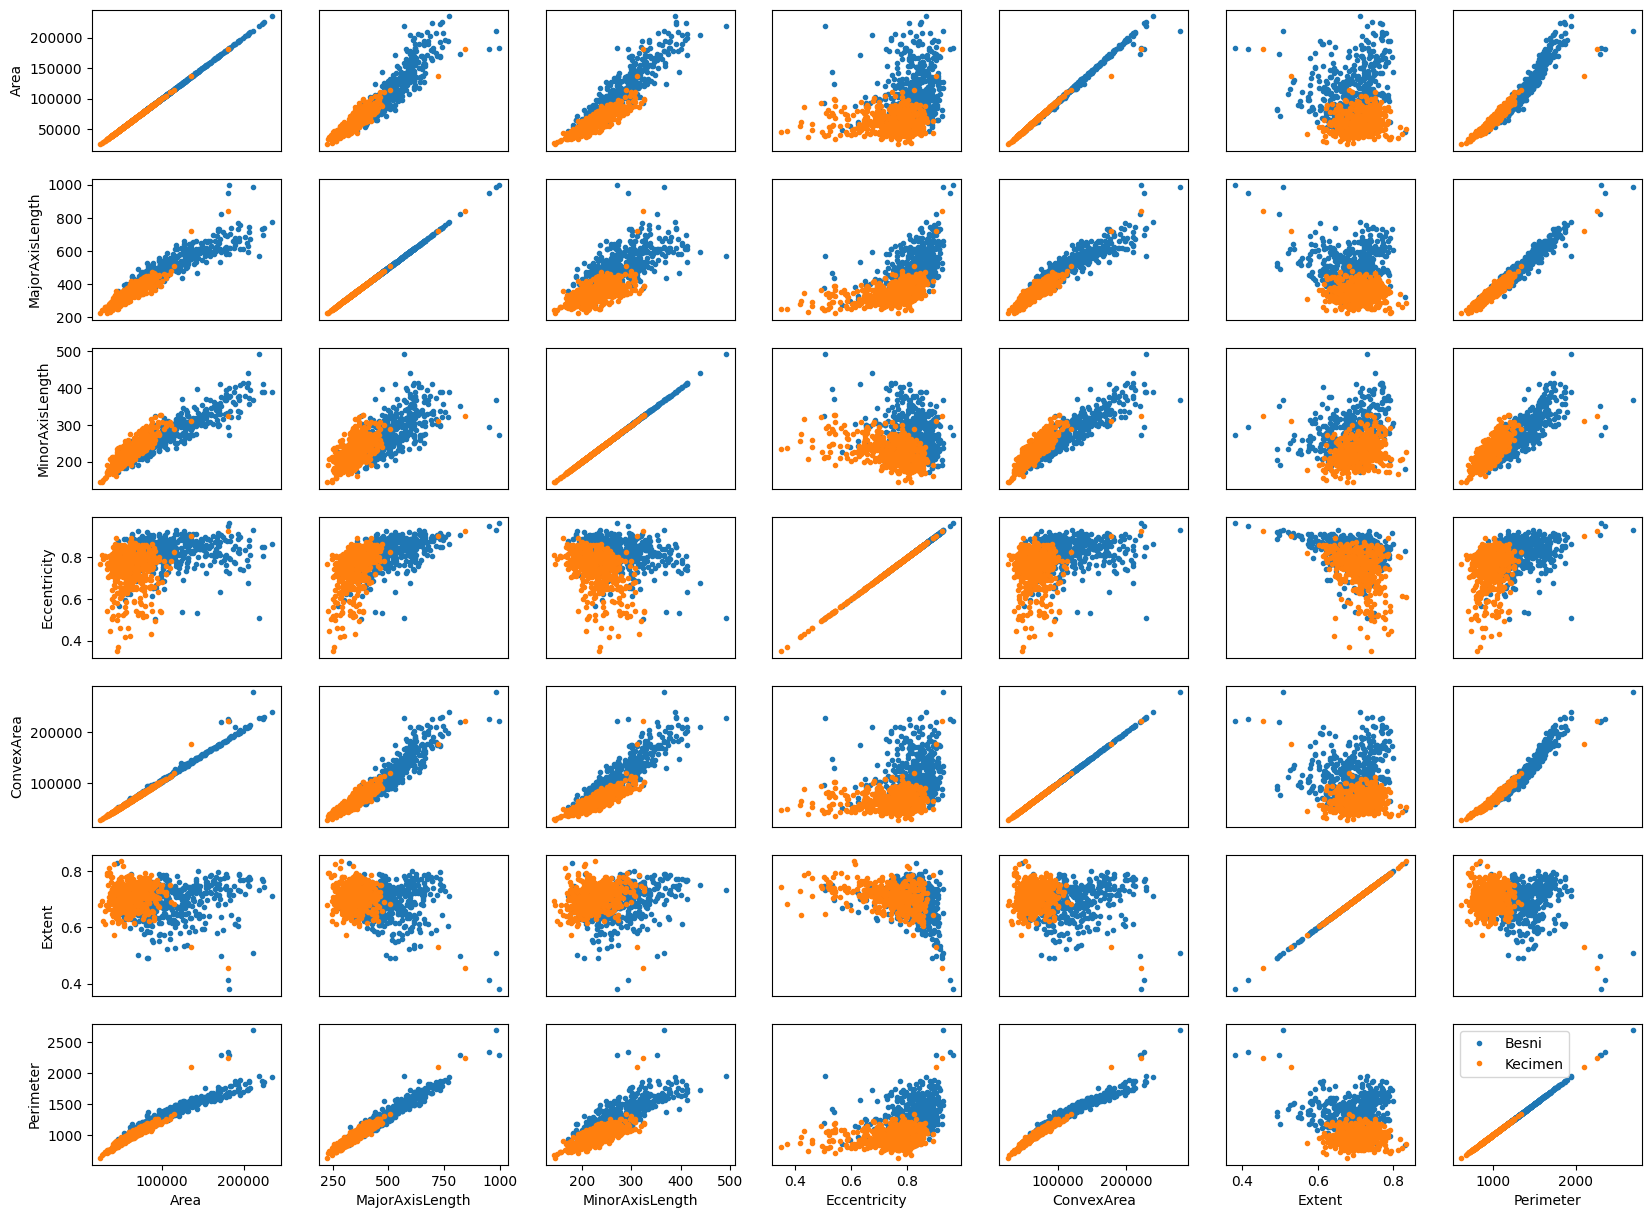

In [5]:
# in a matrix way

plt.figure(figsize=(20, 15))
for m1 in range(M):
    for m2 in range(M):
        plt.subplot(M, M, m1 * M + m2 + 1)
        for c in range(C):
            class_mask = y == c
            plt.plot(np.array(X[class_mask, m2]), np.array(X[class_mask, m1]), ".")
            if m1 == M - 1:
                plt.xlabel(attributeNames[m2])
            else:
                plt.xticks([])
            if m2 == 0:
                plt.ylabel(attributeNames[m1])
            else:
                plt.yticks([])
            # ylim(0,X.max()*1.1)
            # xlim(0,X.max()*1.1)
plt.legend(classNames)

plt.show()

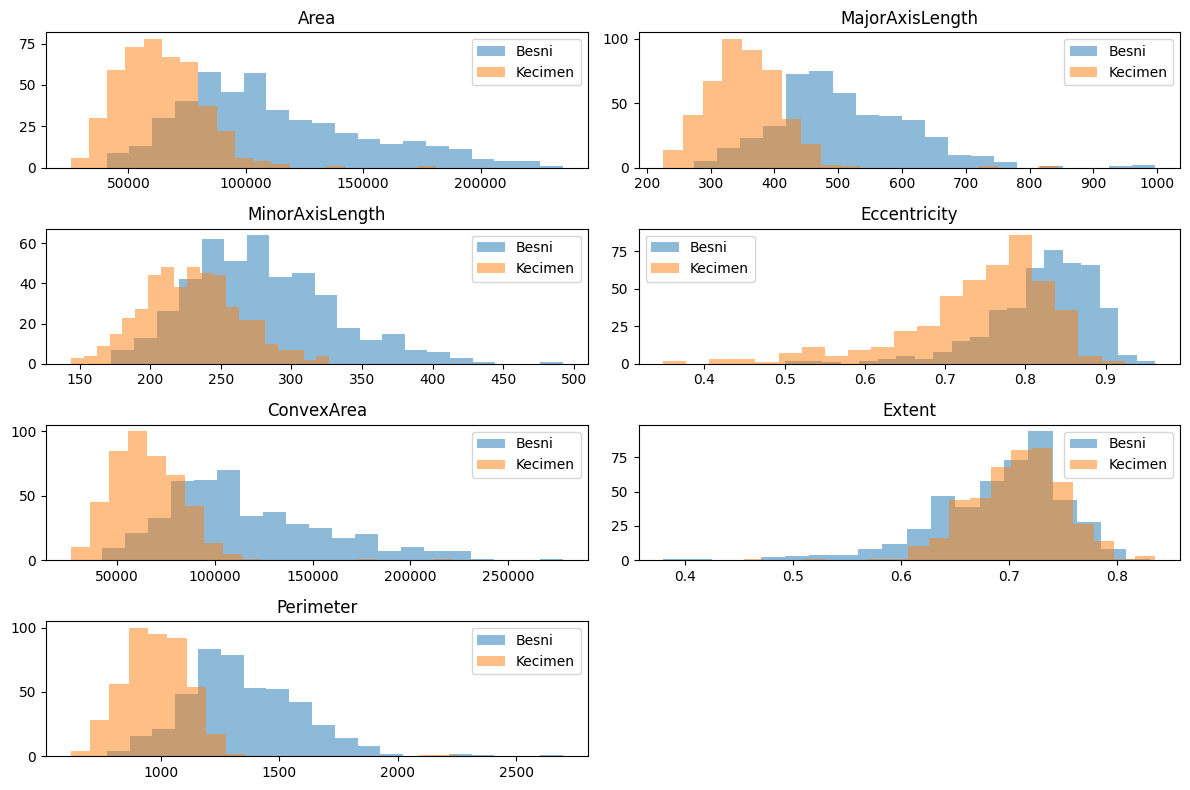

In [6]:
# distribution of attributes

def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/100
    #width_bar = (max(array_data) - min(array_data)) / num + delta
    width_bar = (max(array_data) - min(array_data)) / num
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label, alpha=0.5)
    area = np.sum(y[0]*(width_bar))
    area = np.sum(y[0]*(width_bar-delta))
    #print(f"area under graph = {area:.5f}")

def plot_Gaussian(array_data, mu, sig, num, color, label):
    # computes the gaussian distribution given mu and sig and plots it in the range of the data to avoid zeros
    x = np.linspace(min(array_data), max(array_data), num=num)
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mu)/sig)**2)
    plt.plot(x, y, color=color, label=label)

color_list = ['b', 'orange']

num = 20

#for i in range(len(attributeNames)):
#    for c in range(C):
#        class_mask = y == c
#        attribute = X[class_mask,i]
#
#        plt.figure(i)
#        plt.title(attributeNames[i])
#
#        plt.hist(attribute, bins=num, alpha=0.5)
#
#        mu = attribute.mean()
#        s = attribute.std(ddof=1)
#        
#        x = np.linspace(attribute.min(), attribute.max(), len(attribute))
#        pdf = stats.norm.pdf(attribute, loc=mu, scale=s)
#        plt.plot(x, pdf, color="red")
#
#        plt.legend(classNames)

plt.figure(figsize=(12, 8))
num = 20  # Number of bins

# Calculate the number of rows and columns for subplots
num_plots = len(attributeNames)
num_rows = (num_plots + 1) // 2  # Ensure at least num_plots / 2 rows
num_cols = 2

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i + 1)  # Increment subplot index by 1
    for c in range(C):
        class_mask = y == c
        attribute = X[class_mask, i]

        plt.title(attributeNames[i])

        plt.hist(attribute, bins=num, alpha=0.5, label=classNames[c])

        #mu = attribute.mean()
        #s = attribute.std(ddof=1)
        #
        #x = np.linspace(attribute.min(), attribute.max(), 100)
        #pdf = stats.norm.pdf(x, loc=mu, scale=s)
        #plt.plot(x, pdf, color="red", label="PDF")

        plt.legend()

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()
    

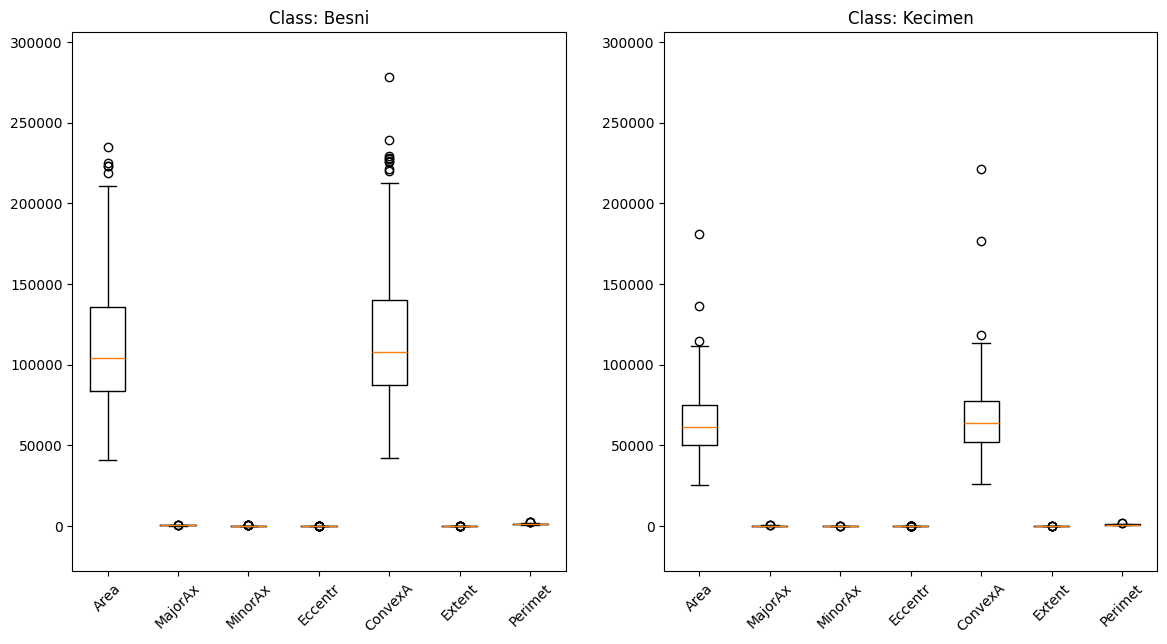

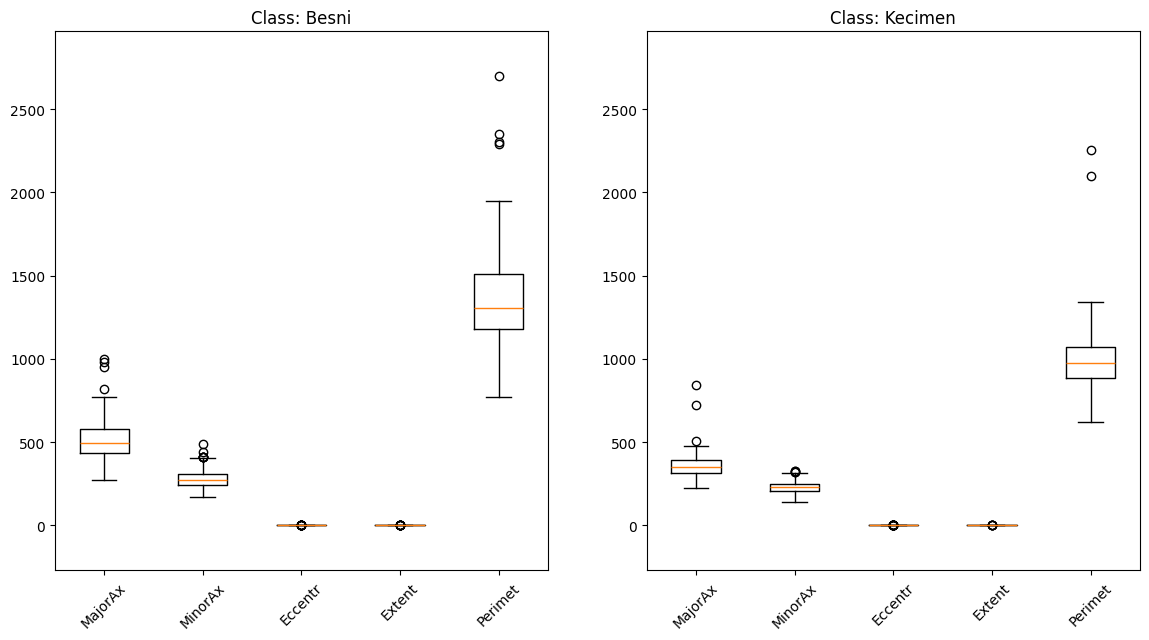

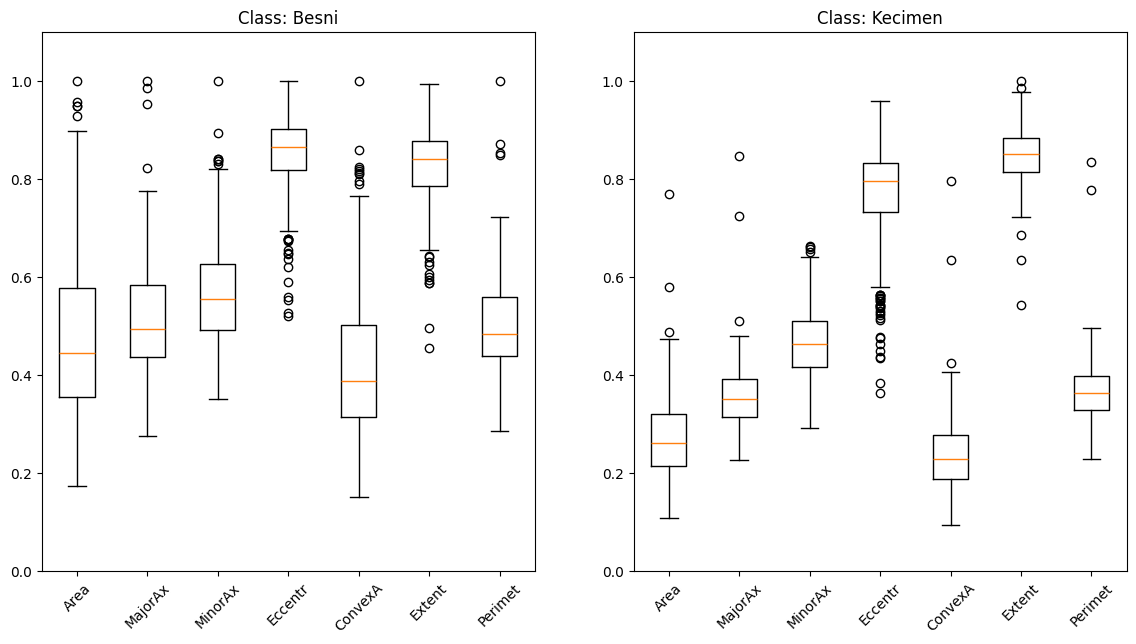

In [7]:
# box plot

#X1 = X - np.ones((N, 1)) * X.mean(axis=0)
#X1 = X1 * (1 / np.std(X1, 0)) 
#
#plt.figure(1, figsize=(15,5))
#plt.title('box plot')
#plt.boxplot(X)
#plt.xticks(range(1, 8), attributeNames)
#
#plt.figure(2, figsize=(15,5))
#plt.boxplot(X1)
#plt.xticks(range(1, 8), attributeNames)


plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c
    plt.boxplot(X[class_mask, :])

    plt.title("Class: " + classNames[c])
    plt.xticks(range(1, len(attributeNames) + 1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)


valid = [1,2,3,5,6]

plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c
    plt.boxplot(X[class_mask][:, valid])  # Adjust indexing to include only valid columns

    plt.title("Class: " + classNames[c])
    plt.xticks(range(1, len(valid) + 1), [attributeNames[i][:7] for i in valid], rotation=45)  # Use valid columns' names
    y_up = X[:, valid].max() + (X[:, valid].max() - X[:, valid].min()) * 0.1  # Use valid columns' min/max
    y_down = X[:, valid].min() - (X[:, valid].max() - X[:, valid].min()) * 0.1
    plt.ylim(y_down, y_up)


plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c

    max_values = np.amax(X, axis=0)
    plt.boxplot(X[class_mask, :]/max_values)

    plt.title("Class: " + classNames[c])
    plt.xticks(range(1, len(attributeNames) + 1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)
    plt.ylim(0,1.1)
plt.show()

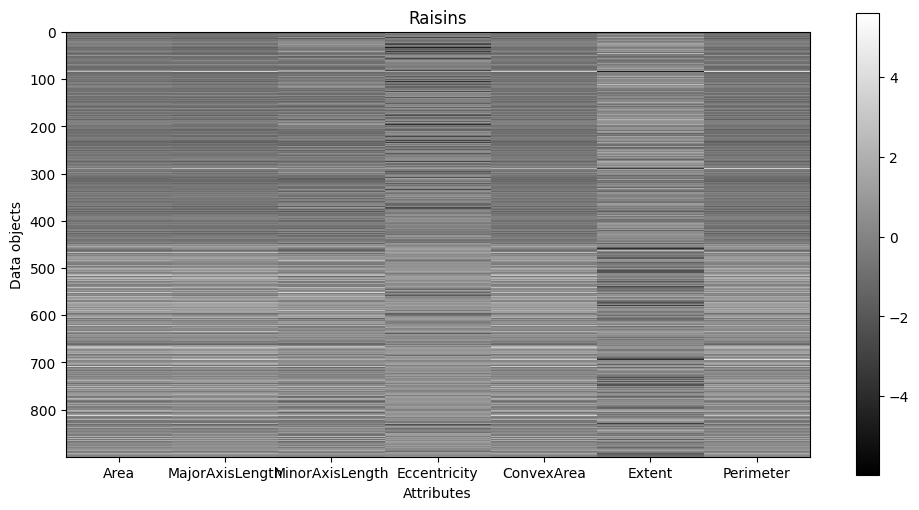

In [8]:
# image visualization

X_standarized = zscore(X, ddof=1)

plt.figure(figsize=(12, 6))
plt.imshow(X_standarized, interpolation="none", aspect=(4.0 / N), cmap=plt.cm.gray)
plt.xticks(range(7), attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Data objects")
plt.title("Raisins")
plt.colorbar()

plt.show()

0.9877037883182944


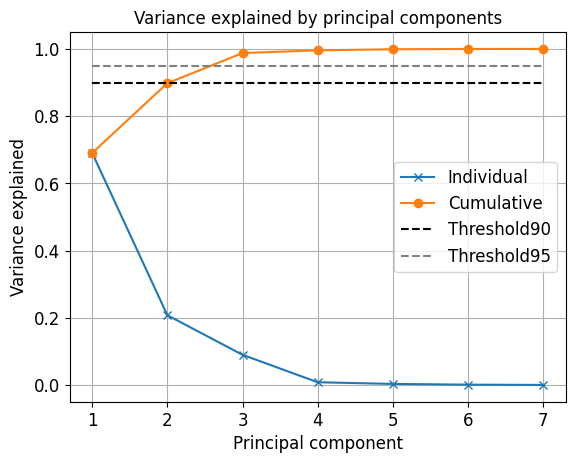

In [34]:
# from exercise 2.1.3

Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))              # important to divide by the stanrdard deviation

U, S, Vh = svd(Y, full_matrices=False)

rho = (S * S) / (S * S).sum()

threshold = 0.9
threshold2 = 0.95

print(rho[0]+rho[1]+rho[2])

plt.rc('font', size=12)        
plt.rc('axes', titlesize=12)   
plt.rc('axes', labelsize=12)   
plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=12)  
plt.rc('legend', fontsize=12)  

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.plot([1, len(rho)], [threshold2, threshold2], color="gray", linestyle="--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold90","Threshold95"])
plt.grid()
plt.show()




6300


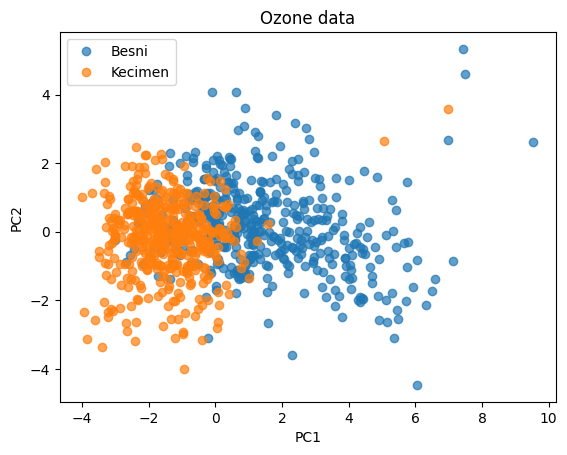

In [10]:
# from exercise 2.1.4

V = Vh.T

Z = Y @ V

i = 0
j = 1

print(Z.size)

# Plot PCA of the data
f = plt.figure()
plt.title("Ozone data")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()



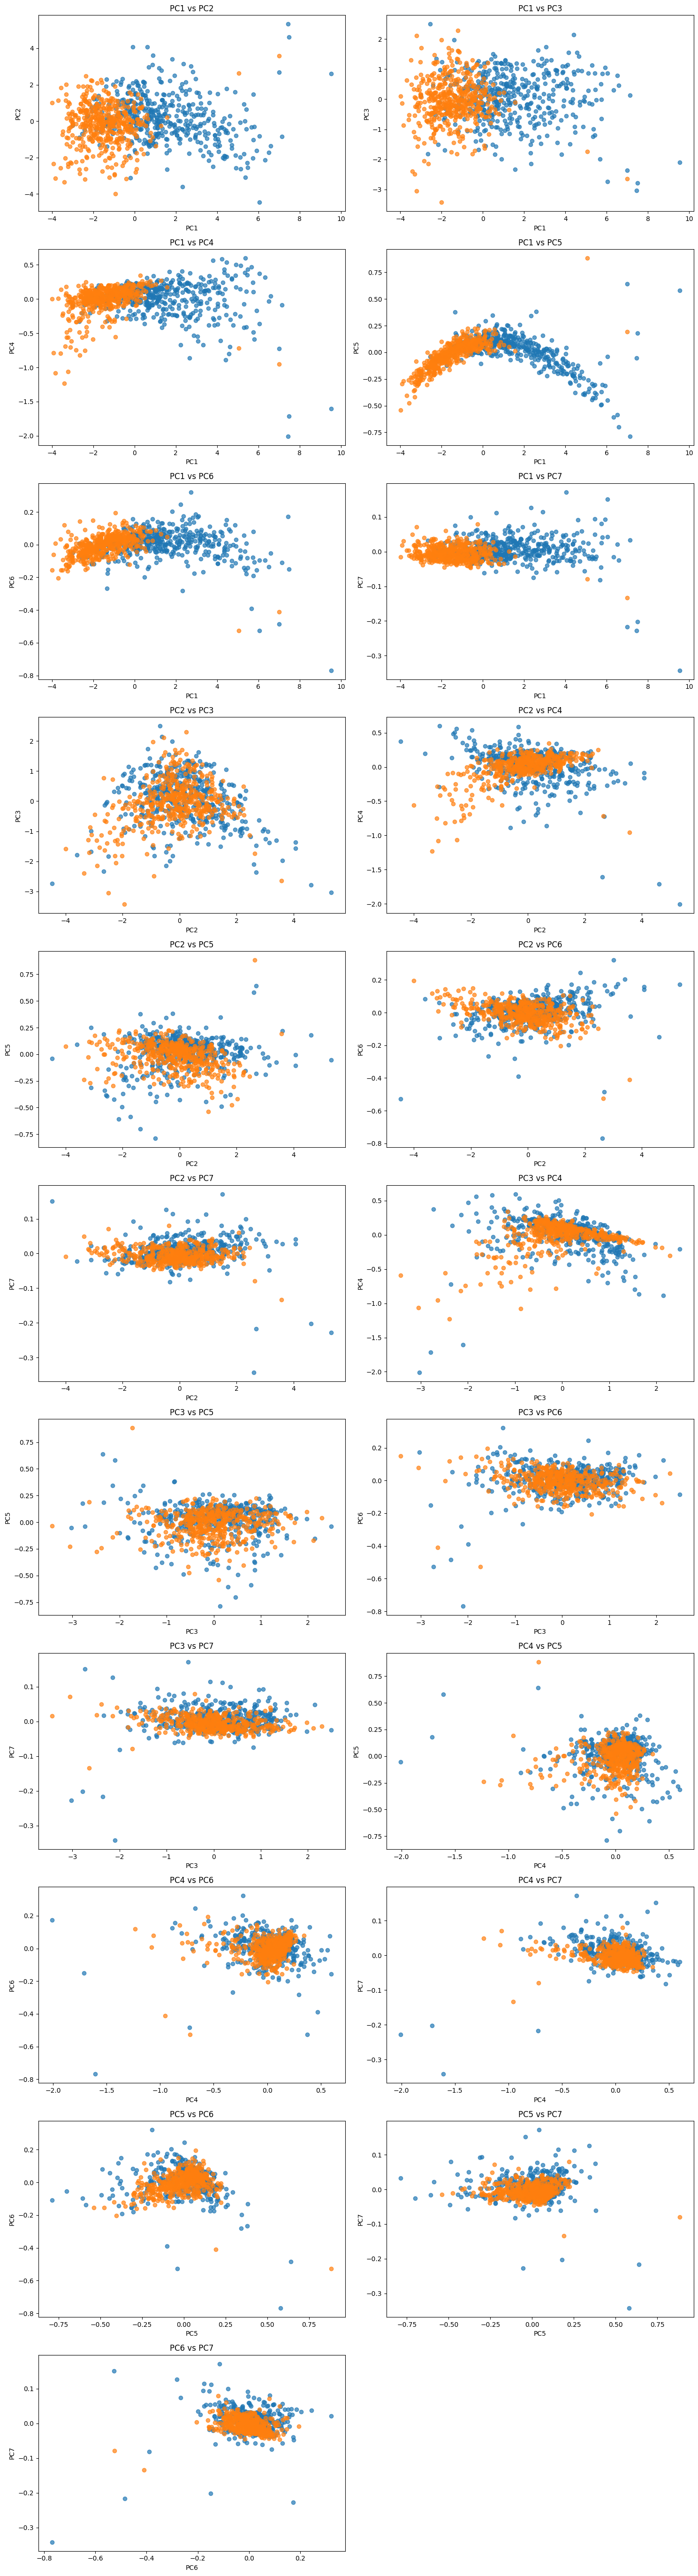

In [11]:
# all combinations

cols = range(0, 7)



# Calculate the number of combinations
num_combinations = len(cols) * (len(cols) - 1) // 2

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(num_combinations / 2))
num_cols = 2

# Create a figure with appropriate size
plt.figure(figsize=(15, num_rows * 5))

# Get all combinations of two elements from cols
comb = []
# Iterate over each element in cols
for i in range(len(cols)):
    # Iterate over elements following the current element to avoid repetition
    for j in range(i + 1, len(cols)):
        # Append the pair (i, j) to the combinations list
        comb.append((cols[i], cols[j]))

# Iterate over each combination of i and j
for idx, (i, j) in enumerate(comb, start=1):
    # Create a subplot for the current combination
    plt.subplot(num_rows, num_cols, idx)
    
    # Title for the subplot
    plt.title("PC{} vs PC{}".format(i + 1, j + 1))
    
    # Iterate over each class
    for c in range(C):
        # Select indices belonging to class c
        class_mask = y == c
        plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.7)
    
    # Set labels for x and y axes
    plt.xlabel("PC{}".format(i + 1))
    plt.ylabel("PC{}".format(j + 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


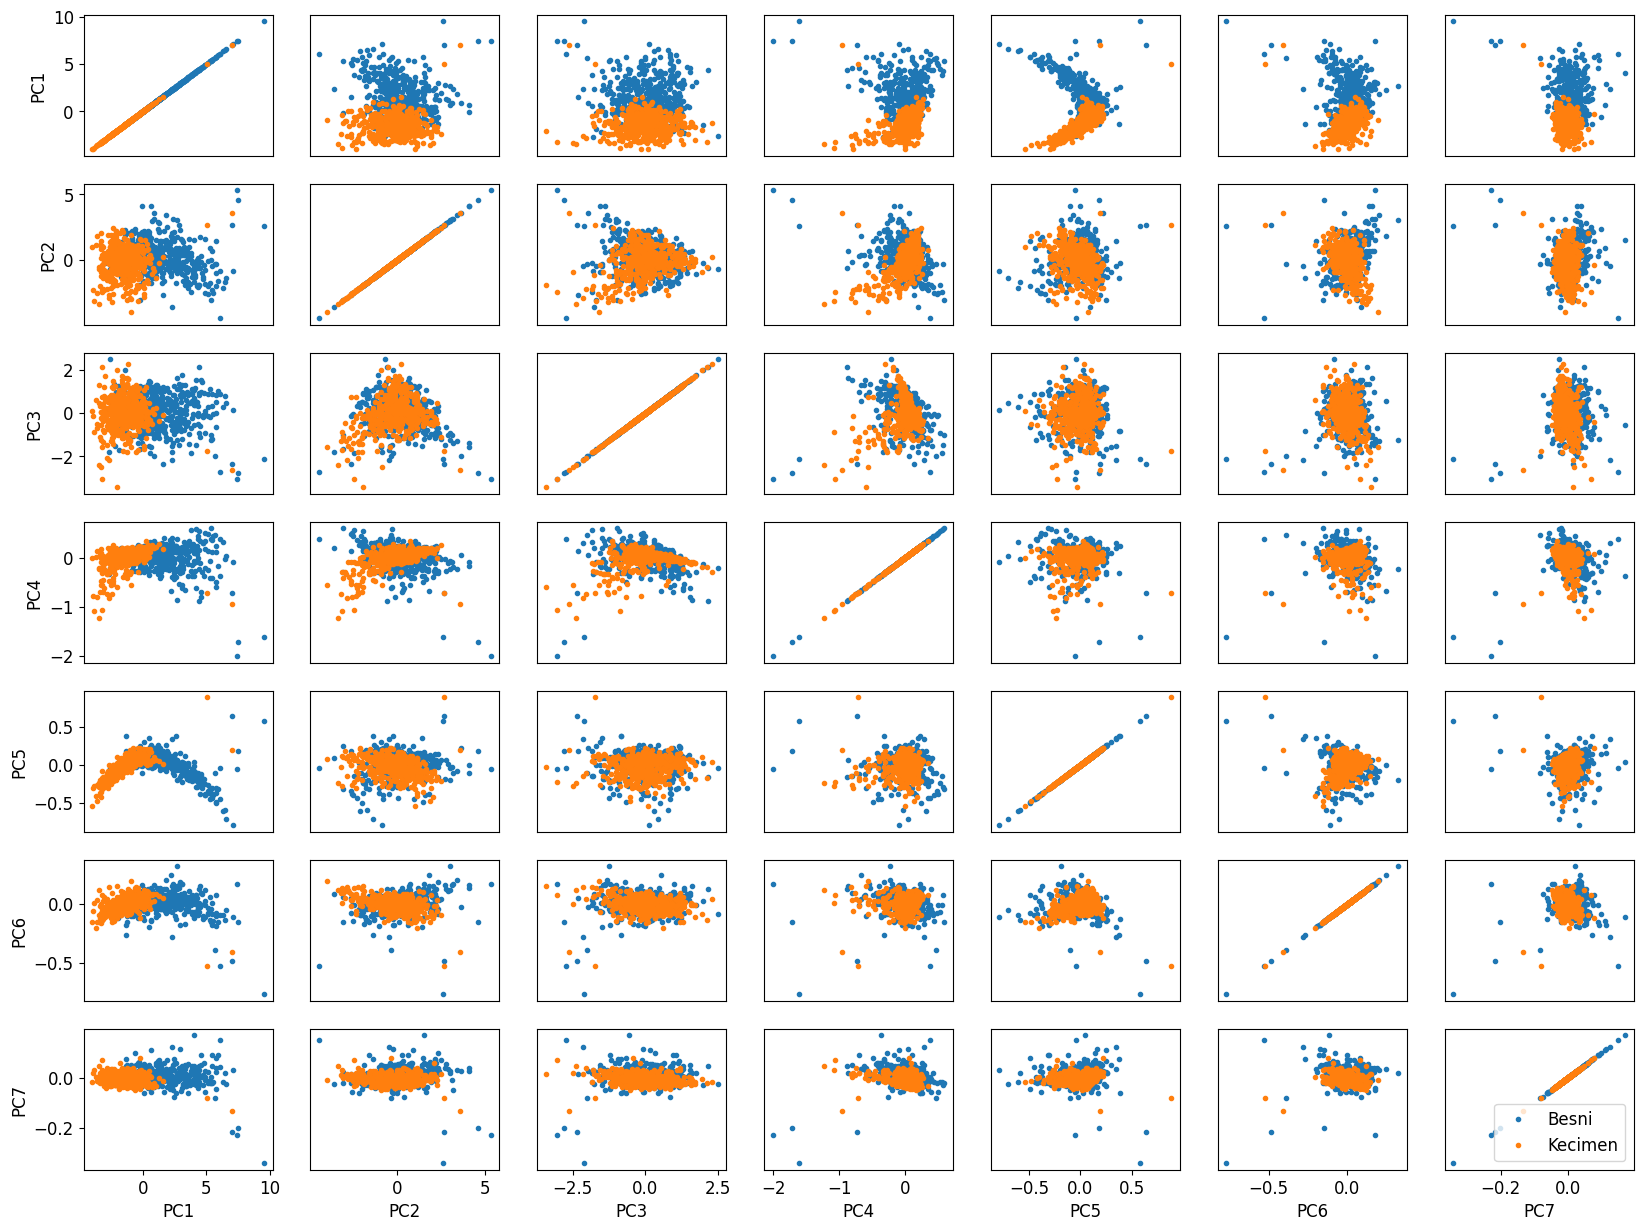

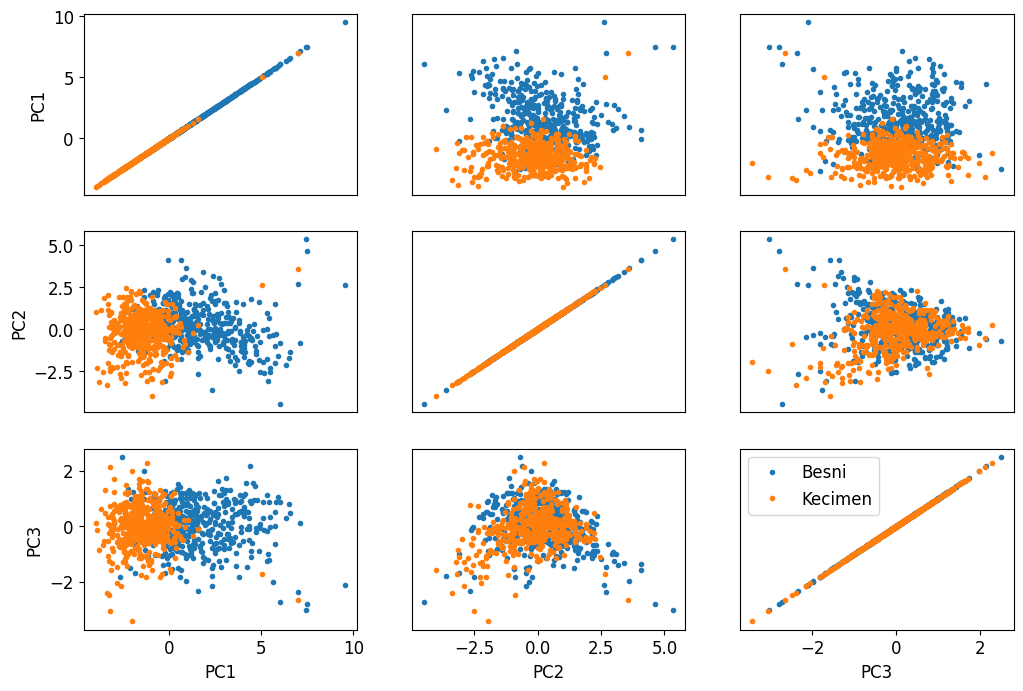

In [38]:
# in a matrix way

plt.figure(figsize=(20, 15))
for m1 in range(M):
    for m2 in range(M):
        plt.subplot(M, M, m1 * M + m2 + 1)
        for c in range(C):
            class_mask = y == c
            plt.plot(np.array(Z[class_mask, m2]), np.array(Z[class_mask, m1]), ".")
            if m1 == M - 1:
                plt.xlabel(attributeNames[m2])
                plt.xlabel("PC{}".format(m2 + 1))
            else:
                plt.xticks([])
            if m2 == 0:
                plt.ylabel(attributeNames[m1])
                plt.ylabel("PC{}".format(m1 + 1))
            else:
                plt.yticks([])
            # ylim(0,X.max()*1.1)
            # xlim(0,X.max()*1.1)
plt.legend(classNames)

plt.show()


M1 = 3
plt.figure(figsize=(12, 8))
for m1 in range(M1):
    for m2 in range(M1):
        plt.subplot(M1, M1, m1 * M1 + m2 + 1)
        for c in range(C):
            class_mask = y == c
            plt.plot(np.array(Z[class_mask, m2]), np.array(Z[class_mask, m1]), ".")
            if m1 == M1 - 1:
                plt.xlabel(attributeNames[m2])
                plt.xlabel("PC{}".format(m2 + 1))
            else:
                plt.xticks([])
            if m2 == 0:
                plt.ylabel(attributeNames[m1])
                plt.ylabel("PC{}".format(m1 + 1))
            else:
                plt.yticks([])
plt.legend(classNames)

plt.show()

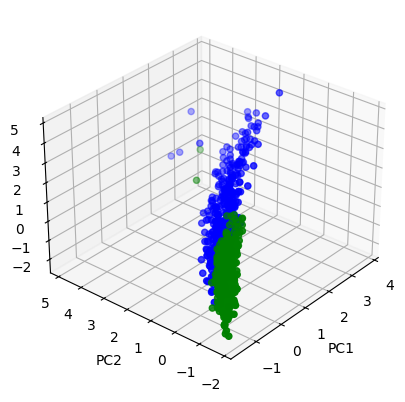

In [13]:
# 3D plot

# Indices of the variables to plot
ind = [0, 1, 2]
colors = ["blue", "green", "red"]

f = plt.figure()
ax = f.add_subplot(111, projection="3d")  # Here the mpl_toolkits is used
for c in range(C):
    class_mask = y == c
    s = ax.scatter(
        Y[class_mask, ind[0]], Y[class_mask, ind[1]], Y[class_mask, ind[2]], c=colors[c]
    )

ax.view_init(30, 220)
ax.set_xlabel("PC{}".format(ind[0] + 1))
ax.set_ylabel("PC{}".format(ind[1] + 1))
ax.set_zlabel("PC{}".format(ind[2] + 1))


plt.show()

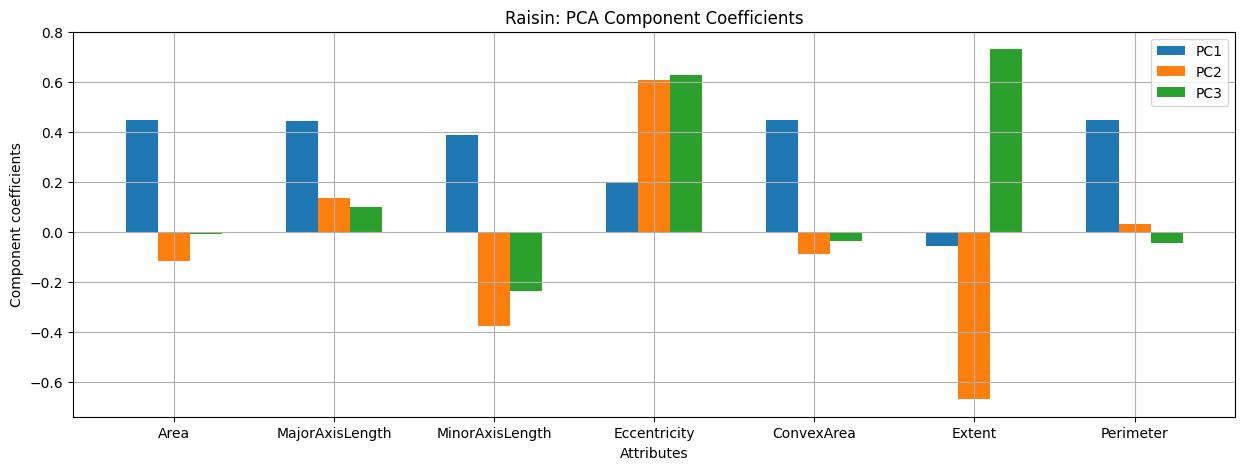

PC2:
Area [-0.11609991]
MajorAxisLength [0.13658724]
MinorAxisLength [-0.37492246]
Eccentricity [0.61082321]
ConvexArea [-0.08761633]
Extent [-0.66734439]
Perimeter [0.03417227]



In [14]:
# from exercise 2.2.4

pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)

plt.figure(1, figsize=(15,5))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Raisin: PCA Component Coefficients")
plt.show()

index = 1
print(f"PC{index+1}:")
for i in range(len(attributeNames)):
    print(attributeNames[i], V[[i], index])
print('')




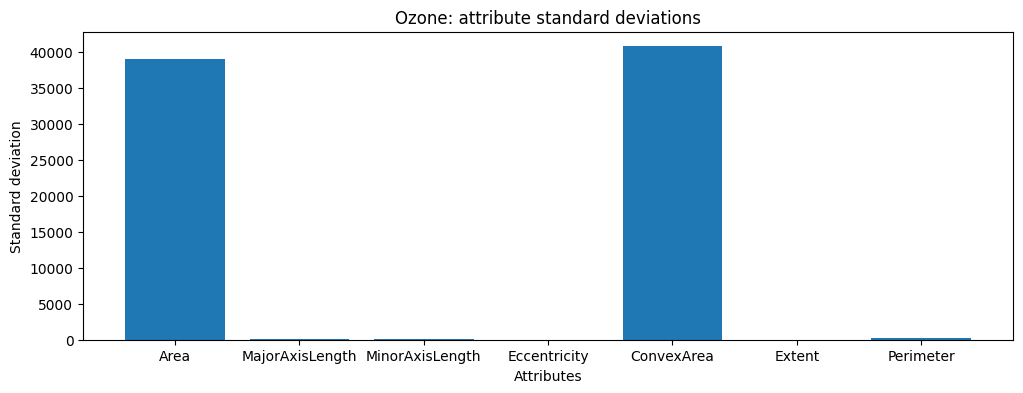

In [15]:
# from ex 2_1_6

plt.figure(1, figsize=(12,4))
r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Ozone: attribute standard deviations")
plt.show()

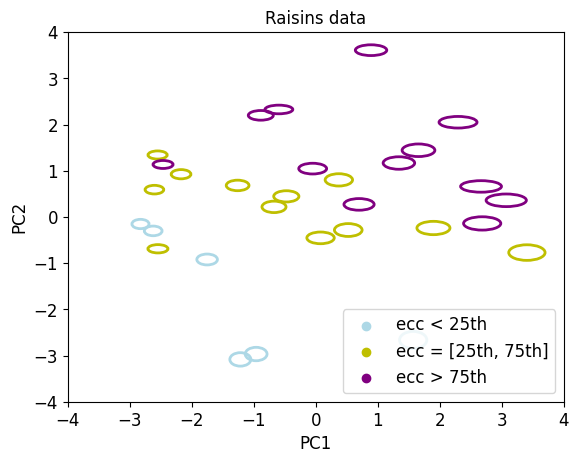

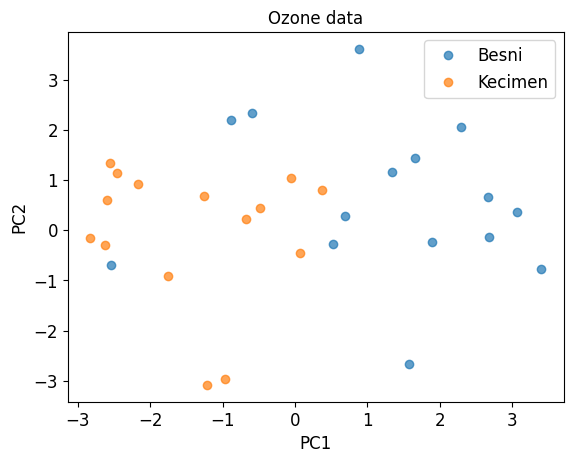

In [45]:
# draw ellipse

max_major = np.max(X[:,1])
max_minor = np.max(X[:,2])
num = 15

ecc = X[:,3]
ecc25 = np.percentile(ecc, 25)
ecc50 = np.percentile(ecc, 50)
ecc75 = np.percentile(ecc, 75)

i = 0
j = 1

fig, ax = plt.subplots()

plt.title("Raisins data")

color_list = ['lightblue', 'y','purple']

for c in range(C):
    class_mask = y == c
    for k in range(num):
        x_coordinate = Z[class_mask][k,i]
        y_coordinate = Z[class_mask][k,j]

        major_axis = X[class_mask][k,1]
        minor_axis = X[class_mask][k,2]
        scale_factor = 0.001

        major_axis = major_axis * scale_factor
        minor_axis = minor_axis * scale_factor    

        eccentric = X[class_mask][k,3]
        if eccentric <= ecc25:
            b=0
        if ecc25 <= eccentric < ecc75:
            b=1
        if eccentric >= ecc75:
            b=2

        ellipse = Ellipse(xy=(x_coordinate, y_coordinate), width=major_axis, height=minor_axis, 
                            edgecolor=color_list[b], fc='None', linewidth=2.0)
        ax.add_patch(ellipse)

plt.xlim(-4,4)
plt.ylim(-4,4)

legend_labels = ['ecc < 25th', 'ecc = [25th, 75th]', 'ecc > 75th']
for color, label in zip(color_list, legend_labels):
    plt.scatter([], [], color=color, label=label)
plt.legend()

plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))


plt.figure(2)
plt.title("Ozone data")
for c in range(C):
    class_mask = y == c
    plt.plot(Z[class_mask][:num, i], Z[class_mask][:num, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))
plt.show()




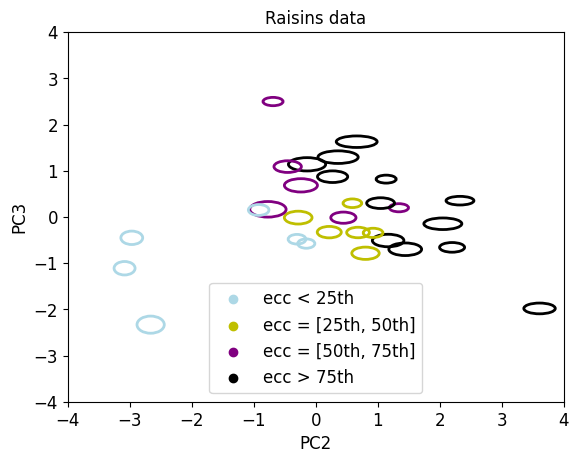

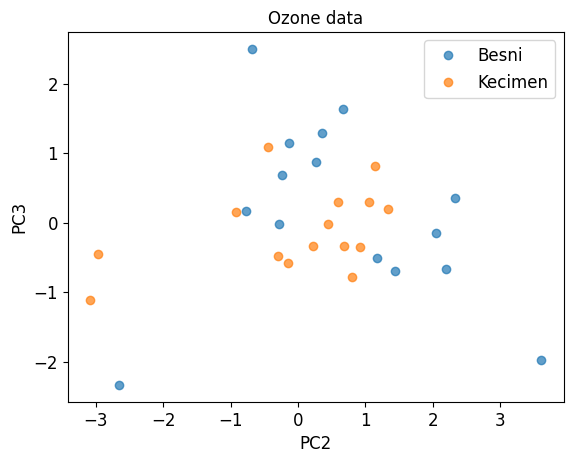

In [52]:
# draw ellipse

max_major = np.max(X[:,1])
max_minor = np.max(X[:,2])
num = 15

ecc = X[:,3]
ecc25 = np.percentile(ecc, 25)
ecc50 = np.percentile(ecc, 50)
ecc75 = np.percentile(ecc, 75)

i = 1
j = 2

fig, ax = plt.subplots()

plt.title("Raisins data")

color_list = ['lightblue', 'y','purple', 'k']

for c in range(C):
    class_mask = y == c
    for k in range(num):
        x_coordinate = Z[class_mask][k,i]
        y_coordinate = Z[class_mask][k,j]

        major_axis = X[class_mask][k,1]
        minor_axis = X[class_mask][k,2]
        scale_factor = 0.001

        major_axis = major_axis * scale_factor
        minor_axis = minor_axis * scale_factor    

        eccentric = X[class_mask][k,3]
        if eccentric <= ecc25:
            b=0
        if ecc25 <= eccentric < ecc50:
            b=1
        if ecc50 <= eccentric < ecc75:
            b=2
        if eccentric >= ecc75:
            b=3

        ellipse = Ellipse(xy=(x_coordinate, y_coordinate), width=major_axis, height=minor_axis, 
                            edgecolor=color_list[b], fc='None', linewidth=2.0)
        ax.add_patch(ellipse)

plt.xlim(-4,4)
plt.ylim(-4,4)

legend_labels = ['ecc < 25th', 'ecc = [25th, 50th]','ecc = [50th, 75th]', 'ecc > 75th']
for color, label in zip(color_list, legend_labels):
    plt.scatter([], [], color=color, label=label)
plt.legend()

plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))


plt.figure(2)
plt.title("Ozone data")
for c in range(C):
    class_mask = y == c
    plt.plot(Z[class_mask][:num, i], Z[class_mask][:num, j], "o", alpha=0.7)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))
plt.show()


